# Numerical Simulation Laboratory
## Exercise Sheet 12

### Exercise 12.1
We use a deep neural network to do handwritten digit recognition with the MNIST dataset. We experiment with different optimizers other than Stochastic Gradient Descent.

In [2]:
### backend and dataset setup
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

In [3]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


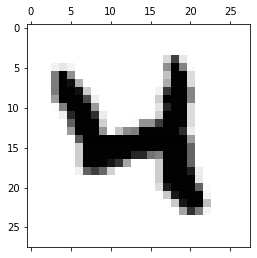

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
labels = np.array([0, 2, 1, 2, 0])
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():  
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

### SGD model

In [7]:
batch_size = 32
epochs = 5

# create the deep neural net
model=create_DNN()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['accuracy'])

# train DNN and store training info in history
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.7562 - acc: 0.7782 - val_loss: 0.3097 - val_acc: 0.9182
Epoch 2/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3794 - acc: 0.8922 - val_loss: 0.2349 - val_acc: 0.9339
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3057 - acc: 0.9134 - val_loss: 0.1993 - val_acc: 0.9409
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2665 - acc: 0.9255 - val_loss: 0.1727 - val_acc: 0.9500
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2328 - acc: 0.9346 - val_loss: 0.1541 - val_acc: 0.9538


10000/10000 [==============================] - 0s 27us/step

Test loss: 0.1540676325879991
Test accuracy: 0.9538


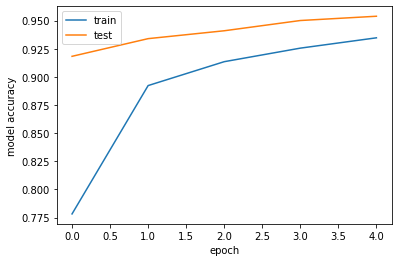

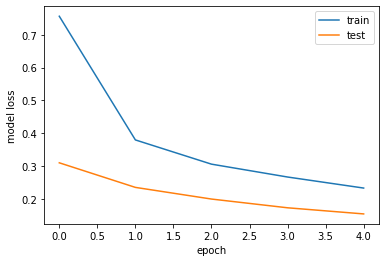

In [8]:
score = model.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Adagrad model
Adagrad is a gradient-descent type algorithm that uses different learning rates for different parameters, and updates them depending on how their importance.

In [9]:
model2=create_DNN()
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(),
              metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2883 - acc: 0.9177 - val_loss: 0.1270 - val_acc: 0.9607
Epoch 2/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1472 - acc: 0.9584 - val_loss: 0.0968 - val_acc: 0.9707
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1136 - acc: 0.9680 - val_loss: 0.0850 - val_acc: 0.9729
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0935 - acc: 0.9736 - val_loss: 0.0804 - val_acc: 0.9744
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0810 - acc: 0.9776 - val_loss: 0.0737 - val_acc: 0.9764


10000/10000 [==============================] - 0s 25us/step

Test loss: 0.07368996346665081
Test accuracy: 0.9764


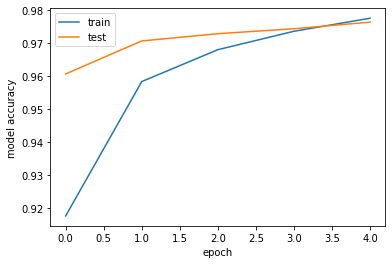

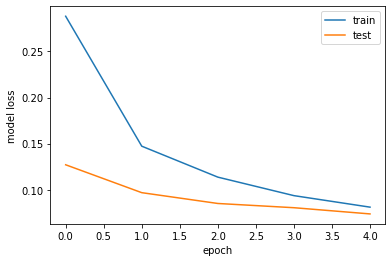

In [10]:
score = model2.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history2 for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Nadam Model
Similarly to Adagrad, Nadam also uses per-parameter learning rates, and updates them using RMS Propagation. The "N" in the name means that a version of Nesterov momentum is implemented.

In [11]:
model3=create_DNN()
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['accuracy'])

history3 = model2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0723 - acc: 0.9792 - val_loss: 0.0709 - val_acc: 0.9767
Epoch 2/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0611 - acc: 0.9824 - val_loss: 0.0663 - val_acc: 0.9800
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0560 - acc: 0.9847 - val_loss: 0.0650 - val_acc: 0.9803
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0508 - acc: 0.9853 - val_loss: 0.0651 - val_acc: 0.9801
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0452 - acc: 0.9873 - val_loss: 0.0633 - val_acc: 0.9809


10000/10000 [==============================] - 0s 28us/step

Test loss: 2.3838983310699464
Test accuracy: 0.0873


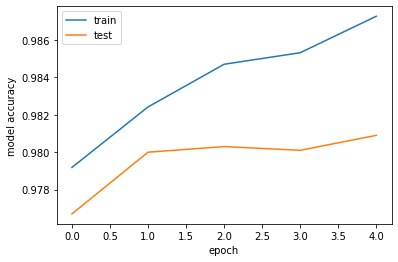

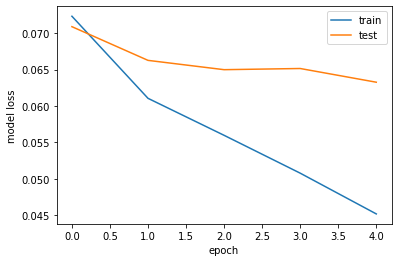

In [12]:
score = model3.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history3 for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

The shape of the graphs suggests that the model could have improved its performance further if it was allowed to train for a few more epochs.

We plot the accuracies and loss of the three different methods against each other:

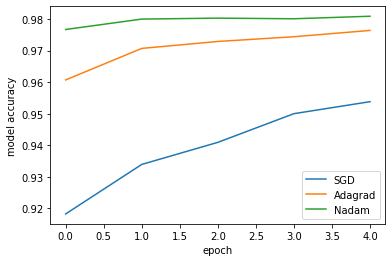

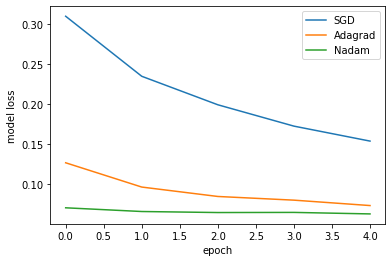

In [13]:
plt.plot(history.history['val_acc'],label="SGD")
plt.plot(history2.history['val_acc'],label="Adagrad")
plt.plot(history3.history['val_acc'],label="Nadam")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'],label="SGD")
plt.plot(history2.history['val_loss'],label="Adagrad")
plt.plot(history3.history['val_loss'],label="Nadam")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

At least in this simple case, it seems that any upgrade to the basic SGD algorithm can result in a improvement in performance.

### Exercise 12.2
We apply a convolutional neural network to our digit-recognition problem.

In [14]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='nadam',
                  metrics=['accuracy'])
    return model

In [15]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()


# # train CNN
historyc = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.3135 - acc: 0.9030 - val_loss: 0.1610 - val_acc: 0.9645
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1324 - acc: 0.9601 - val_loss: 0.1080 - val_acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.1061 - acc: 0.9675 - val_loss: 0.1040 - val_acc: 0.9746
Epoch 4/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0964 - acc: 0.9699 - val_loss: 0.0859 - val_acc: 0.9764
Epoch 5/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0868 - acc: 0.9738 - val_loss: 0.0787 - val_acc: 0.9781
Epoch 6/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0816 - acc: 0.9749 - val_loss: 0.0790 - val_acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0768 - acc: 0.9760 - val_loss: 0.

10000/10000 [==============================] - 1s 100us/step

Test loss: 0.0702867013387382
Test accuracy: 0.9807


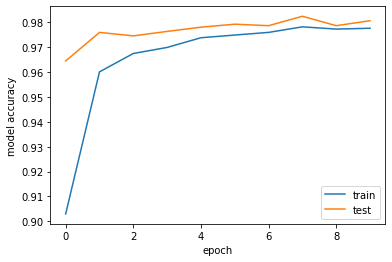

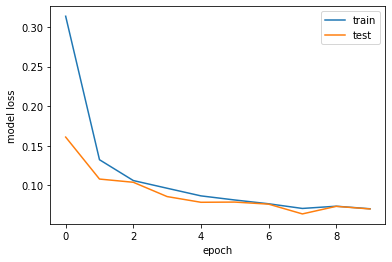

In [16]:
score = model_CNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(historyc.history['acc'])
plt.plot(historyc.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize historyc for loss
plt.plot(historyc.history['loss'])
plt.plot(historyc.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

We compare the efficiency of the convolutional neural network with the dense NN used above. Both are optimized using the Nadam algorithm.

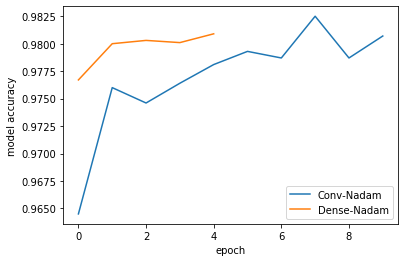

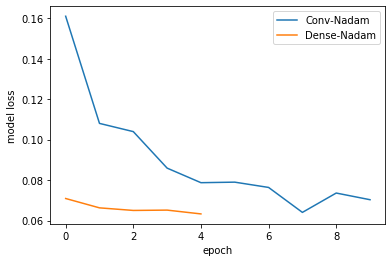

In [17]:
plt.plot(historyc.history['val_acc'],label="Conv-Nadam")
plt.plot(history3.history['val_acc'],label="Dense-Nadam")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(historyc.history['val_loss'],label="Conv-Nadam")
plt.plot(history3.history['val_loss'],label="Dense-Nadam")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

We see that the convolutional neural network can achieve similar results using less neurons. However it seems to converge slower.

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


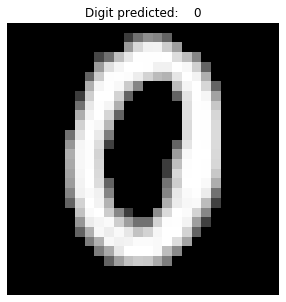

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


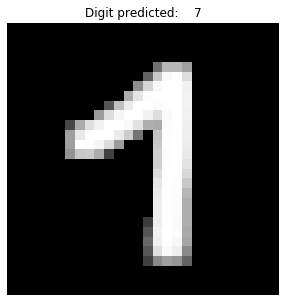

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


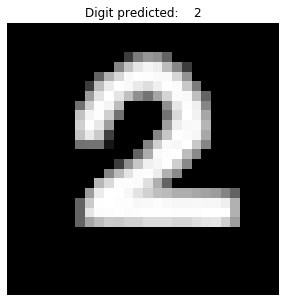

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


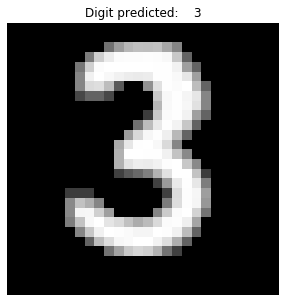

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


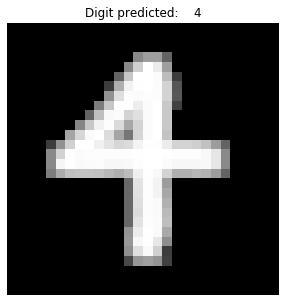

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


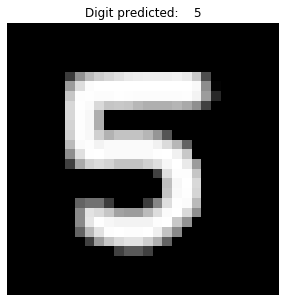

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


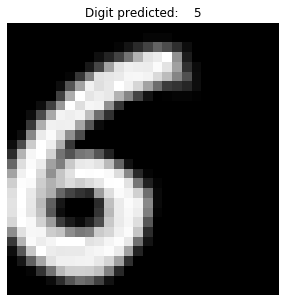

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


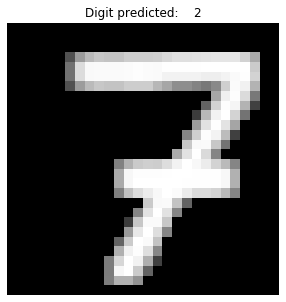

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


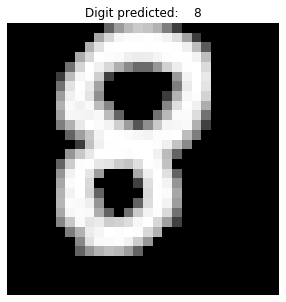

Image size: 28x28
(28, 28)
(1, 28, 28, 1)


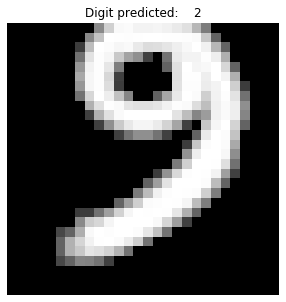

60.0 % success


In [18]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

kount = 0.
for number in range(10):
    digit_filename = "./images/"+str(number)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    print(data.shape)
    data = data.reshape(1,xdim*ydim)
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    print(data.shape)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')
    if number == np.argmax(pred_0):
        kount = kount+1
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()
    
print (kount*10,"% success")

Although the model's accuracy on MNIST validation data was very high $(\sim 98\%)$, the results on my own handwritten digits are rather poor. This suggests that the network's generalization capabilities are not as wide as one would hope, and that it would be necessary to use digits more similar to mine during the training as well. 